# Data understanding, preparation and EDA

## Step 1: Reading and Understanding the Data

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [69]:
#read the data
bikesharing_df = pd.read_csv("day.csv")

In [70]:
# Check the head of the dataset
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 - Inspect the various aspects of the bikesharing dataframe. 
 - See the size, shape, notnull count
 - Distribution of numeric data 

In [71]:
bikesharing_df.shape

(730, 16)

In [72]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [73]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data


We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [74]:
bikesharing_df_numeric=bikesharing_df[["cnt","temp","atemp","hum","windspeed"]]

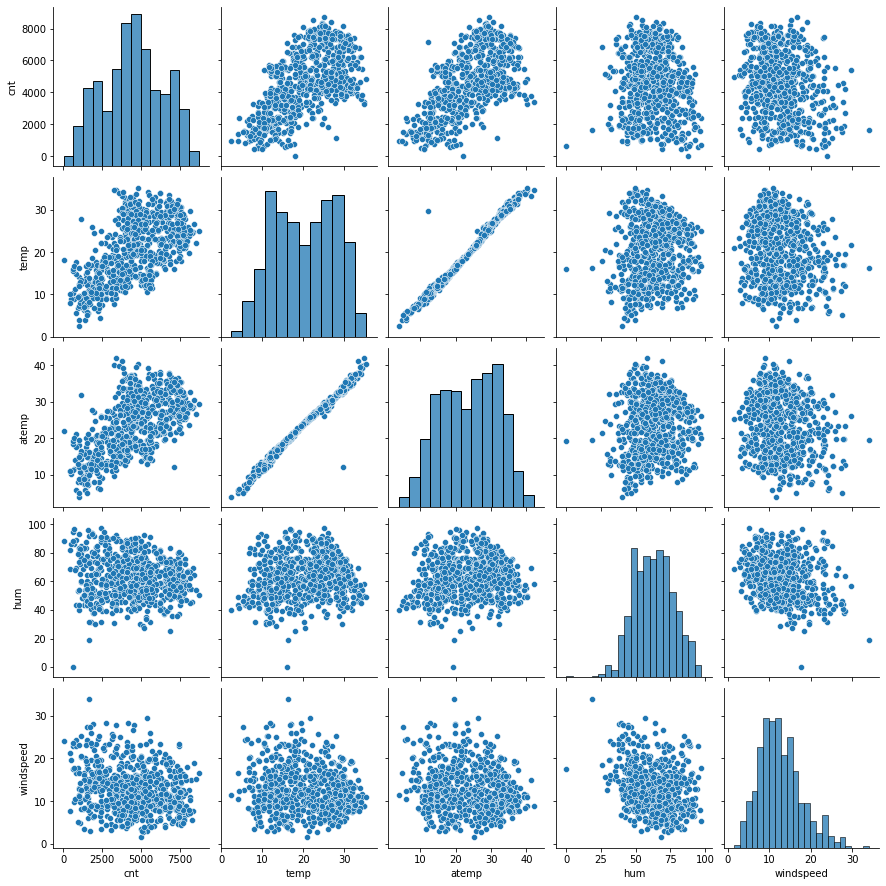

In [75]:
sns.pairplot(bikesharing_df_numeric)
plt.show()

 -  From above pair plot, we can observe that cnt is somewhat linearly dependent on temp,atemp and humidity

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

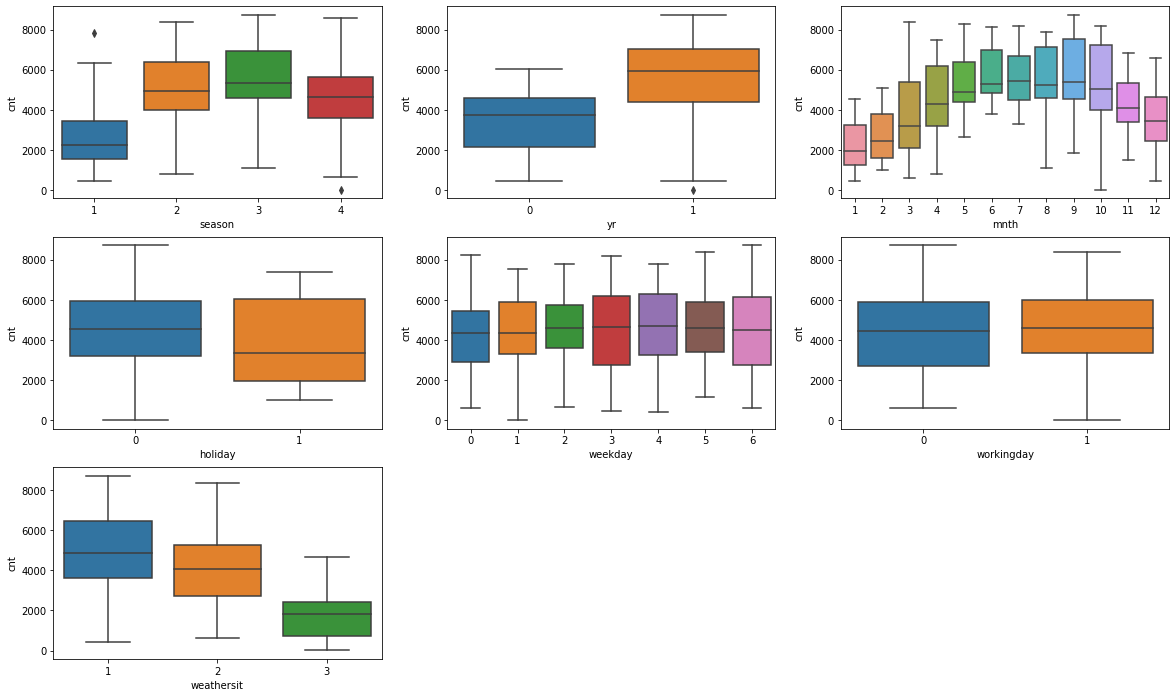

In [76]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_df)
plt.show()

From above boxplot, we can observe
- features like season, year, month, weathersit has significant effect on count where as 
- features like holiday, weekday, workingday are not having much significant effect on count

## Step 3: Data Preparation

### Drop unnecesary columns

- cnt= casual + registered. Hence casual and registered are not needed for evaluation
- instant column is just for indexing dataset.
- date is not of much use. dataset already has year,month as important derived column

In [77]:
bikesharing_df= bikesharing_df.drop(["casual","registered","instant","dteday"],axis=1)

In [78]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables


#### Season

There are 4 levels for season variable. Hence create 4-1=3 dummy variabls. I have created the dummy variable manually to name the column meaningfully and interpreting the final model easily.

Mapping is like below 
- season=1, is_spring=true
- season=2, is_summer=true
- season=3, is_winter=true
- season=4, all are false

In [79]:
bikesharing_df["is_spring"]=bikesharing_df["season"].map(lambda x: 1 if x==1 else 0)
bikesharing_df["is_summer"]=bikesharing_df["season"].map(lambda x: 1 if x==2 else 0)
bikesharing_df["is_winter"]=bikesharing_df["season"].map(lambda x: 1 if x==3 else 0)

In [80]:
bikesharing_df= bikesharing_df.drop(["season"],axis=1)

#### Month variable
- I have added it manually for giving meaningful names to columns. But it can be done automatic way using get_dummies pandas

In [81]:
bikesharing_df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [82]:
bikesharing_df["is_jan"]=bikesharing_df["mnth"].map(lambda x: 1 if x==1 else 0)
bikesharing_df["is_feb"]=bikesharing_df["mnth"].map(lambda x: 1 if x==2 else 0)
bikesharing_df["is_mar"]=bikesharing_df["mnth"].map(lambda x: 1 if x==3 else 0)
bikesharing_df["is_april"]=bikesharing_df["mnth"].map(lambda x: 1 if x==4 else 0)
bikesharing_df["is_may"]=bikesharing_df["mnth"].map(lambda x: 1 if x==5 else 0)
bikesharing_df["is_jun"]=bikesharing_df["mnth"].map(lambda x: 1 if x==6 else 0)
bikesharing_df["is_july"]=bikesharing_df["mnth"].map(lambda x: 1 if x==7 else 0)
bikesharing_df["is_aug"]=bikesharing_df["mnth"].map(lambda x: 1 if x==8 else 0)
bikesharing_df["is_sept"]=bikesharing_df["mnth"].map(lambda x: 1 if x==9 else 0)
bikesharing_df["is_oct"]=bikesharing_df["mnth"].map(lambda x: 1 if x==10 else 0)
bikesharing_df["is_nov"]=bikesharing_df["mnth"].map(lambda x: 1 if x==11 else 0)

In [83]:
bikesharing_df= bikesharing_df.drop(["mnth"],axis=1)

##### Rename the yr column to is_year_2019 .

The purpose of renaming is to have a more meaningful column name

 - if yr=1, it is 2019
 - else it is zero

In [84]:
bikesharing_df.rename(columns = {'yr':'is_yr_2019'}, inplace = True)

In [85]:
bikesharing_df.head()

,is_yr_2019,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,is_feb,is_mar,is_april,is_may,is_jun,is_july,is_aug,is_sept,is_oct,is_nov
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


#### Weathersit variable
There are 4 levels. 
 - 1: clear
 - 2: Mist + cloudy
 - 3: Light Snow
 - 4: Heavy rain +Ice Palllets
Hence we create 4-1=3 dummy variables

In [86]:
bikesharing_df["is_weather_good"]=bikesharing_df["weathersit"].map(lambda x: 1 if x==1 else 0)
bikesharing_df["is_weather_bad"]=bikesharing_df["weathersit"].map(lambda x: 1 if x==2 else 0)
bikesharing_df["is_weather_wrose"]=bikesharing_df["weathersit"].map(lambda x: 1 if x==3 else 0)

In [87]:
bikesharing_df= bikesharing_df.drop(["weathersit"],axis=1)

In [88]:
bikesharing_df.head()

,is_yr_2019,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,is_spring,...,is_may,is_jun,is_july,is_aug,is_sept,is_oct,is_nov,is_weather_good,is_weather_bad,is_weather_wrose
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


##### taking care of weekday
 - in stead of creating 6 dummy variables , let's create 1 dummy variable which indicates whether it is weekday or weekend.
 
 - In dataset, 4 is mapped to saturday and 5 is mapped to sunday
 - Hence if it is 4 or 5, isweekend=1, else 0



In [89]:
bikesharing_df["is_weekend"]=bikesharing_df["weekday"].map(lambda x: 1 if (x==4 or x==5) else 0)

In [90]:
bikesharing_df= bikesharing_df.drop(["weekday"],axis=1)

#### Bring the cnt column to the front to ease the calculation
- Since cnt is our output variable, it is better to bring to front for easy interpretation

In [91]:
# shift column 'cnt' to first position
first_column = bikesharing_df.pop('cnt')
bikesharing_df.insert(0, 'cnt', first_column)

In [92]:
bikesharing_df.head()

,cnt,is_yr_2019,holiday,workingday,temp,atemp,hum,windspeed,is_spring,is_summer,...,is_jun,is_july,is_aug,is_sept,is_oct,is_nov,is_weather_good,is_weather_bad,is_weather_wrose,is_weekend
0,985,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,...,0,0,0,0,0,0,0,1,0,0
1,801,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
bikesharing_df.describe()

,cnt,is_yr_2019,holiday,workingday,temp,atemp,hum,windspeed,is_spring,is_summer,...,is_jun,is_july,is_aug,is_sept,is_oct,is_nov,is_weather_good,is_weather_bad,is_weather_wrose,is_weekend
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,0.246575,0.252055,...,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.634247,0.336986,0.028767,0.284932
std,1936.011647,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,0.431313,0.434490,...,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.481971,0.473004,0.167266,0.451691
min,22.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3169.750000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4548.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5966.000000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,8714.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
bikesharing_df.shape

(730, 26)

Final shape of dataset after data preparartion stage is 730 rows, 26 columns

# Building Model

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [95]:

np.random.seed(0)
df_train, df_test = train_test_split(bikesharing_df, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the Features 

Here we can see that different attributes are having different sacles. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'windspeed','cnt']

#
# scaler.fit
# scaler.tranform
# scaler.fit_tranform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [99]:
df_train.head()

,cnt,is_yr_2019,holiday,workingday,temp,atemp,hum,windspeed,is_spring,is_summer,...,is_jun,is_july,is_aug,is_sept,is_oct,is_nov,is_weather_good,is_weather_bad,is_weather_wrose,is_weekend
367,0.254717,1,0,1,0.113228,0.061963,0.454701,0.695175,1,0,...,0,0,0,0,0,0,1,0,0,0
648,0.868385,1,0,1,0.468352,0.462175,0.477458,0.299450,0,0,...,0,0,0,0,1,0,1,0,0,1
44,0.217556,0,0,1,0.443431,0.419099,0.387290,0.807474,1,0,...,0,0,0,0,0,0,1,0,0,0
705,0.573631,1,0,1,0.326094,0.318824,0.787463,0.189819,0,0,...,0,0,0,0,0,0,0,1,0,1
379,0.263346,1,0,0,0.133996,0.108365,0.431945,0.449210,1,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
df_train.describe()

,cnt,is_yr_2019,holiday,workingday,temp,atemp,hum,windspeed,is_spring,is_summer,...,is_jun,is_july,is_aug,is_sept,is_oct,is_nov,is_weather_good,is_weather_bad,is_weather_wrose,is_weekend
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.515792,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.251712,0.246575,...,0.077055,0.075342,0.090753,0.080479,0.092466,0.080479,0.630137,0.342466,0.027397,0.258562
std,0.225336,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.434369,0.431387,...,0.266907,0.264169,0.287504,0.272267,0.289931,0.272267,0.483181,0.474941,0.163378,0.438220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350696,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.522837,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.691872,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


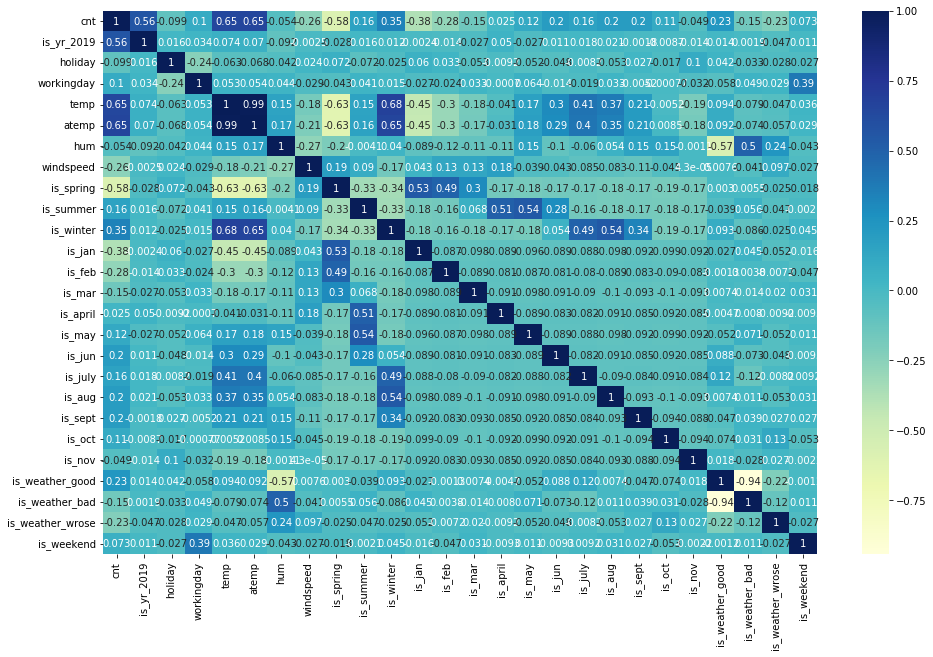

In [101]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [102]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

- There are many ways to build a multiple regresion model like manual forward selection, manual backward elemination, recursive feature elimination.
- Here we use combination of recursive feature elemination and manual backward elemination

In [103]:
# Check all the columns of the dataframe

bikesharing_df.columns

Index(['cnt', 'is_yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'is_spring', 'is_summer', 'is_winter', 'is_jan', 'is_feb',
       'is_mar', 'is_april', 'is_may', 'is_jun', 'is_july', 'is_aug',
       'is_sept', 'is_oct', 'is_nov', 'is_weather_good', 'is_weather_bad',
       'is_weather_wrose', 'is_weekend'],
      dtype='object')



### This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE (Recursive feature elimination)


Since there are 25 columns as input predictor, it is not advisable to do backward elimination by one by one.
- we can use RFE to filter to 10 most important features, then use manual backward elimination one by one

In [104]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [105]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('is_yr_2019', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('is_spring', True, 1),
 ('is_summer', False, 7),
 ('is_winter', True, 1),
 ('is_jan', False, 15),
 ('is_feb', False, 11),
 ('is_mar', False, 6),
 ('is_april', False, 10),
 ('is_may', False, 8),
 ('is_jun', False, 9),
 ('is_july', False, 13),
 ('is_aug', False, 3),
 ('is_sept', True, 1),
 ('is_oct', True, 1),
 ('is_nov', False, 16),
 ('is_weather_good', False, 2),
 ('is_weather_bad', False, 5),
 ('is_weather_wrose', True, 1),
 ('is_weekend', False, 14)]

In [107]:
col = X_train.columns[rfe.support_]
col

Index(['is_yr_2019', 'holiday', 'temp', 'hum', 'windspeed', 'is_spring',
       'is_winter', 'is_sept', 'is_oct', 'is_weather_wrose'],
      dtype='object')

In [108]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'is_summer', 'is_jan', 'is_feb', 'is_mar',
       'is_april', 'is_may', 'is_jun', 'is_july', 'is_aug', 'is_nov',
       'is_weather_good', 'is_weather_bad', 'is_weekend'],
      dtype='object')

Now we have reduced our input variables from 25 to 10. Let's not do a detailed statitics manually and perform backward elimination

### Building model using statsmodel, for the detailed statistics

In [109]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [110]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [111]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [112]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     290.9
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          4.40e-217
Time:                        22:05:06   Log-Likelihood:                 568.97
No. Observations:                 584   AIC:                            -1116.
Df Residuals:                     573   BIC:                            -1068.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4175      0.027  

In [113]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [114]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.24
3,hum,12.00
4,windspeed,4.14
6,is_winter,2.91
0,is_yr_2019,2.04
5,is_spring,1.98
7,is_sept,1.28
8,is_oct,1.26
9,is_weather_wrose,1.12
1,holiday,1.04


 - from above p value and VIF statitics, we conclude that `temp` variable is highly collinear with other variables,hence redundant. We can remove iut.

In [115]:
X_train_new = X_train_rfe.drop(["temp"], axis = 1)

Rebuilding the model without `temp`

In [116]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [117]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [118]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          6.07e-165
Time:                        22:05:06   Log-Likelihood:                 443.46
No. Observations:                 584   AIC:                            -866.9
Df Residuals:                     574   BIC:                            -823.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6349      0.030  

In [119]:
X_train_lm.columns

Index(['const', 'is_yr_2019', 'holiday', 'hum', 'windspeed', 'is_spring',
       'is_winter', 'is_sept', 'is_oct', 'is_weather_wrose'],
      dtype='object')

In [120]:
X_train_new = X_train_lm.drop(['const'], axis=1)

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,4.99
3,windspeed,3.75
0,is_yr_2019,1.95
5,is_winter,1.69
4,is_spring,1.60
6,is_sept,1.26
7,is_oct,1.26
8,is_weather_wrose,1.07
1,holiday,1.04


- Now we can see no VIF value is above 5. Henec we can colclude it is a good model.

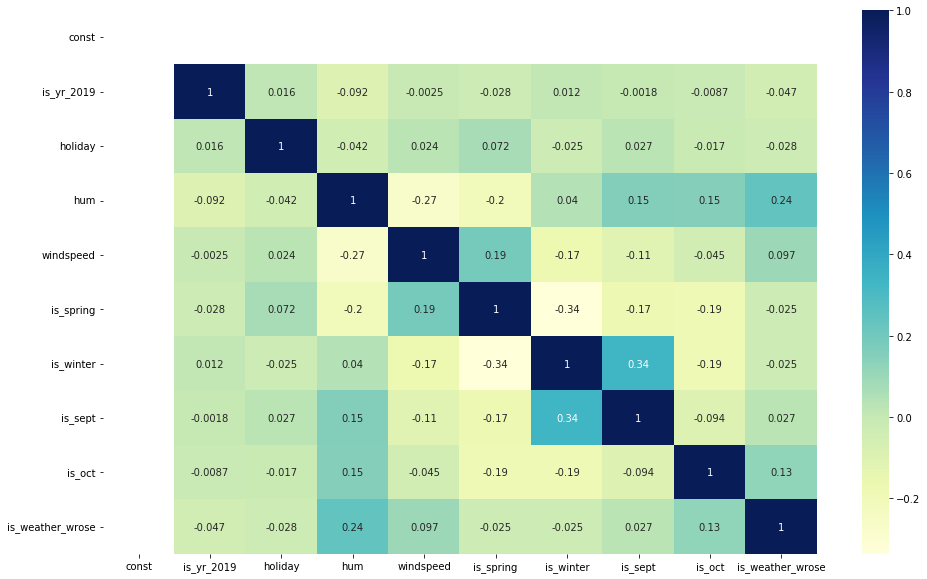

In [122]:
# Let's check the correlation coefficients to see if any  variable pair is highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_lm.corr(), annot = True, cmap="YlGnBu")
plt.show()

- In above we can see no colinerity value is more than 40%. Hence we can conclude this is the final model

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [123]:
y_train_price = lm.predict(X_train_lm)

In [124]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

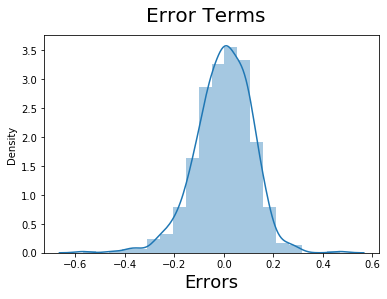

In [125]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


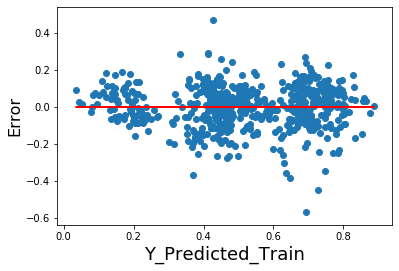

In [126]:
# look for patterns in residuals (ideally, we are expecting no pattern )

plt.scatter(y_train_price,(y_train - y_train_price))
zero_arr=np.zeros(y_train_price.shape[0])
plt.plot(y_train_price,zero_arr,'r')
plt.xlabel('Y_Predicted_Train', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                        
plt.show()

From above plotMean seems to be zero and error seems to be following a normal distribution

## Step 7: Making Predictions

#### Applying the scaling on the test sets

In [127]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [128]:
y_test = df_test.pop('cnt')
X_test = df_test

In [129]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [130]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step-8 Model Evaluation

Text(0, 0.5, 'y_pred')

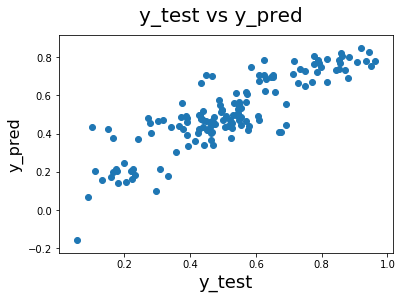

In [131]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- In above plot, we can see that predicted y value is nearly equal to actual y value 

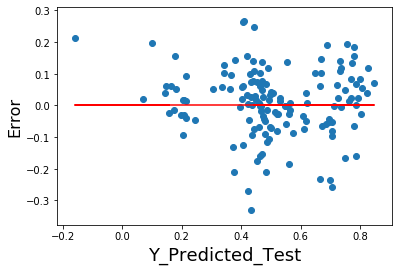

In [132]:
# look for patterns in residuals (ideally, we are expecting no pattern )

plt.scatter(y_pred,(y_test-y_pred))
zero_arr=np.zeros(y_pred.shape[0])
plt.plot(y_pred,zero_arr,'r')
plt.xlabel('Y_Predicted_Test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                        
plt.show()

In [133]:
lm.params

const               0.634862
is_yr_2019          0.238165
holiday            -0.106942
hum                -0.211978
windspeed          -0.192019
is_spring          -0.251362
is_winter           0.071424
is_sept             0.076734
is_oct              0.070325
is_weather_wrose   -0.249966
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = 0.635 + 0.238  \times  isyr2019 - 0.107  \times  holiday - 0.211 \times hum - 0.192 \times windspeed - 0.25 \times isspring + 0.071 \times iswinter + 0.076 \times issept + 0.070 \times isoct - 0.25 \times isweaterworse $


Overall we have a decent model.